In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
df2 = pd.read_csv('/content/Dataset.csv')
df3 = pd.read_csv('/content/TestData.csv')

In [ ]:
df2.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], inplace=True)
df3.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], inplace=True)

In [ ]:
df["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [ ]:
df2["Label"].unique()

array(['SSH-Bruteforce', 'FTP-BruteForce', 'Benign'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])
df2["Label"] = le.transform(df2["Label"])
df3["Label"] = le.transform(df3["Label"])

In [ ]:
df["Label"].value_counts()

Label
0    667626
1    193360
2    187589
Name: count, dtype: int64

In [ ]:
df2["Label"].value_counts()

Label
1    1391
2    1009
0     326
Name: count, dtype: int64

In [ ]:
df3["Label"].value_counts()

Label
2    208
0    163
1    132
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['Timestamp'],axis = 1)
df2 = df2.drop(columns=['Timestamp'],axis = 1)


In [ ]:
np.isinf(df).values.sum()

5371

In [ ]:
np.isinf(df2).values.sum()

0

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isna().sum()

Dst Port                0
Protocol                0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          3824
Flow Pkts/s          3824
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s              0
Bwd Pkts/s  

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df2.isna().sum()

Dst Port             0
Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var

In [ ]:
df = df.dropna()

In [ ]:
df2 = df2.dropna()

In [ ]:
df.columns.shape

(79,)

In [ ]:
df2.columns.shape

(79,)

In [ ]:
zero_columns2 = df2.columns[(df2 == 0).all()]
zero_columns2

Index(['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Fwd Seg Size Min'],
      dtype='object')

In [ ]:
zero_columns = df.columns[(df == 0).all()]
zero_columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'],
      dtype='object')

In [ ]:
# Find the common zero columns
common_zero_columns = set(zero_columns).intersection(set(zero_columns2))

# Convert the set back to a list if needed
common_zero_columns_list = list(common_zero_columns)

# Print or use the common zero columns list
print(common_zero_columns_list)

['CWE Flag Count', 'Bwd Blk Rate Avg', 'Fwd Byts/b Avg', 'Fwd Blk Rate Avg', 'Bwd URG Flags', 'Bwd Pkts/b Avg', 'Bwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd URG Flags']


In [ ]:
df.drop(common_zero_columns_list, axis=1, inplace=True)

In [ ]:
df2.drop(common_zero_columns_list, axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor # Decison tree
extr = RandomForestClassifier(criterion="entropy")

In [ ]:
X = df2.drop(columns=["Label"], axis=1)
y = df2["Label"]

In [ ]:
extr.fit(X,y)

RandomForestClassifier(criterion='entropy')

In [ ]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([1.15602184e-01, 4.22411361e-05, 5.28983234e-03, 8.74043800e-03,
       1.32975717e-02, 1.05860325e-02, 5.60786803e-02, 2.50019444e-02,
       1.19940251e-04, 6.12406454e-03, 2.33064997e-02, 3.21716216e-02,
       9.98407028e-04, 3.26966665e-02, 5.95610053e-02, 2.90995915e-02,
       8.89837622e-03, 8.28892371e-03, 2.69335257e-03, 5.86356810e-03,
       3.75649354e-03, 6.79010266e-03, 4.56387599e-03, 2.67485613e-03,
       1.05269487e-03, 1.25090553e-03, 5.70022612e-03, 7.79821496e-03,
       5.15011934e-03, 8.84870887e-03, 7.87882676e-03, 0.00000000e+00,
       1.95084737e-04, 9.76114474e-03, 1.92425323e-02, 5.99385381e-03,
       9.70643896e-03, 1.31100409e-03, 4.49836112e-02, 3.88006695e-02,
       5.56599968e-02, 4.26151327e-02, 3.96024369e-04, 7.56193329e-04,
       0.00000000e+00, 1.32319627e-04, 1.01854656e-03, 0.00000000e+00,
       0.00000000e+00, 1.43955173e-02, 3.37572883e-02, 2.47290153e-02,
       1.49841884e-02, 5.97739848e-03, 5.25315505e-03, 1.01912229e-02,
      

In [ ]:
imp=pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp

,Gain_Score
0,0.115602
1,0.000042
2,0.005290
3,0.008740
4,0.013298
5,0.010586
6,0.056079
7,0.025002
8,0.000120
9,0.006124


In [ ]:
X.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Sub

In [ ]:
cols = pd.DataFrame(X.columns, columns=['Feature_Names'])
cols

,Feature_Names
0,Dst Port
1,Protocol
2,Flow Duration
3,Tot Fwd Pkts
4,Tot Bwd Pkts
5,TotLen Fwd Pkts
6,TotLen Bwd Pkts
7,Fwd Pkt Len Max
8,Fwd Pkt Len Min
9,Fwd Pkt Len Mean


In [ ]:
gains = pd.concat([cols,imp], axis=1)
# gains

In [ ]:
gains.nlargest(15,'Gain_Score')

,Feature_Names,Gain_Score
0,Dst Port,0.115602
58,Init Bwd Win Byts,0.088244
14,Bwd Pkt Len Std,0.059561
6,TotLen Bwd Pkts,0.056079
40,Pkt Len Std,0.055660
56,Subflow Bwd Byts,0.045840
38,Pkt Len Max,0.044984
41,Pkt Len Var,0.042615
39,Pkt Len Mean,0.038801
50,Pkt Size Avg,0.033757


In [ ]:
# gains.nlargest(15,'Gain_Score')['Feature_Names']

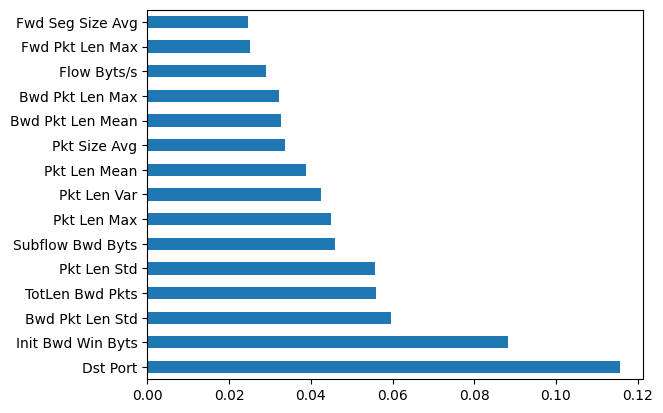

<Figure size 800x600 with 0 Axes>

In [ ]:
gains = pd.Series(feature_importance, index=X.columns)
gains.nlargest(15).plot(kind='barh')
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
preserved_columns = ['Dst Port'
,  'Init Bwd Win Byts'
,'TotLen Bwd Pkts'
,       'Pkt Len Max'
, 'Fwd Act Data Pkts'
,  'Bwd Pkt Len Max'
, 'Subflow Bwd Byts'
,   'Pkt Len Std'
,  'Pkt Size Avg'
,   'Bwd Pkt Len Std'
, 'Bwd Seg Size Avg'
,     'Pkt Len Var'
,'Bwd Pkt Len Mean'
,    'Flow Byts/s'
, 'Subflow Bwd Pkts'
,'Label']

In [ ]:
dfc = df[preserved_columns]
df2c = df2[preserved_columns]
df3c = df3[preserved_columns]

In [ ]:
dfc.shape

(1044751, 16)

In [ ]:
df2c.shape

(2726, 16)

In [ ]:
df3c.shape

(503, 16)

In [ ]:
X = dfc.drop(columns=["Label"], axis=1)
y = dfc["Label"]

In [ ]:
X_my = df2c.drop(columns=["Label"], axis=1)
y_my = df2c["Label"]

In [ ]:
X_my_test = df3c.drop(columns=["Label"], axis=1)
y_my_test = df3c["Label"]

In [ ]:
X.shape, y.shape

((1044751, 15), (1044751,))

In [ ]:
X_my.shape, y_my.shape

((2726, 15), (2726,))

In [ ]:
X.head(5)

,Dst Port,Init Bwd Win Byts,TotLen Bwd Pkts,Pkt Len Max,Fwd Act Data Pkts,Bwd Pkt Len Max,Subflow Bwd Byts,Pkt Len Std,Pkt Size Avg,Bwd Pkt Len Std,Bwd Seg Size Avg,Pkt Len Var,Bwd Pkt Len Mean,Flow Byts/s,Subflow Bwd Pkts
0,0,-1,0,0,0,0,0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,-1,0,0,0,0,0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0,-1,0,0,0,0,0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,22,233,2273,976,6,976,2273,277.834760,140.48,371.677892,227.300000,77192.153846,227.300000,544.161528,10
4,22,233,2209,976,6,976,2209,279.763032,134.08,362.249864,200.818182,78267.353846,200.818182,380.733175,11


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(731325, 15)
(731325,)
(313426, 15)
(313426,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_my_std = sc.transform(X_my)
X_my_test_std = sc.transform(X_my_test)
print(X_my_std.shape)

(2726, 15)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_std, y_train)

In [ ]:
y_pred = clf.predict(X_test_std)
y_pred

array([2, 0, 2, ..., 0, 0, 0])

In [ ]:
y_my_pred = clf.predict(X_my_test_std)
y_my_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 15


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Accuracy: %.3f' % accuracy_score(y_my_test, y_my_pred))

Accuracy: 1.000
Accuracy: 0.423


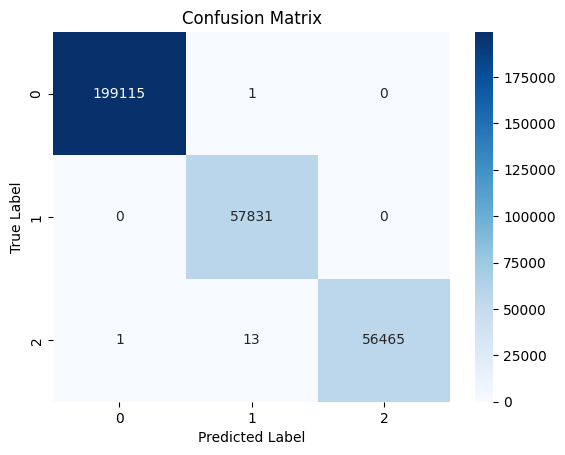

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

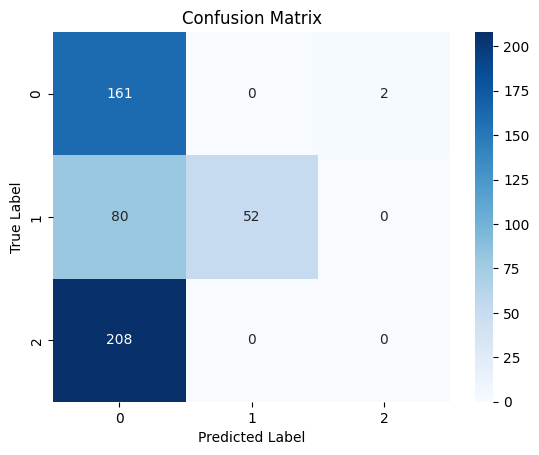

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Classification report: \n', classification_report(y_my_test, y_my_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.36      0.99      0.53       163
           1       1.00      0.39      0.57       132
           2       0.00      0.00      0.00       208

    accuracy                           0.42       503
   macro avg       0.45      0.46      0.36       503
weighted avg       0.38      0.42      0.32       503



In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

#intial time = t1
train_time =[0,0,0,0,0]
pred_time = [0,0,0,0,0]
accuracy = [0,0,0,0,0]
FPR_arr = [0,0,0,0,0]
FNR_arr = [0,0,0,0,0]
t1 = time.time()

clf2 = DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(X_my_std, y_my)

#final time = t2
t2 = time.time()

#Training processing time = train_time
train_time[0] = t2 -t1

In [ ]:
#intial time = t1
t1 = time.time()

y_my_pred1 = clf2.predict(X_my_test_std)
print(y_my_pred1)

#final time = t2
t2 = time.time()

#Prediction processing time = train_time
pred_time[0] = t2 -t1


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print('Processing Time for Training  : %.3f' % train_time[0])
print('Processing Time for Prediction: %.3f' % pred_time[0])

Processing Time for Training  : 0.010
Processing Time for Prediction: 0.005


In [ ]:
accuracy[0] = accuracy_score(y_my_test, y_my_pred1)
print('Accuracy: %.3f' % accuracy[0])

Accuracy: 1.000


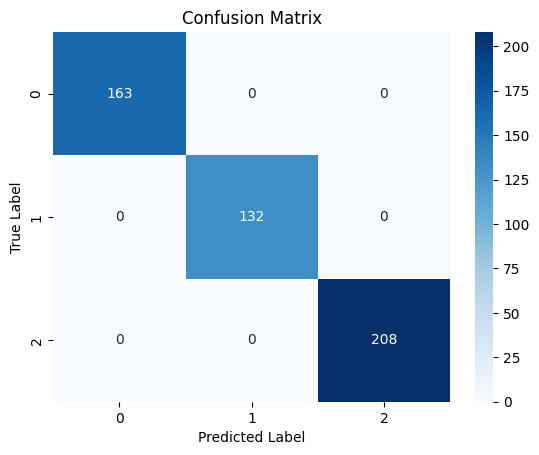

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred1)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification report: \n', classification_report(y_my_test, y_my_pred1))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       208

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = (cm.sum() - (FP + FN + TP)).sum()
FP = FP.sum()
print("False Positives:",FP)
FN = FN.sum()
print("False Negatives:",FN)
TP = TP.sum()
print("True Positives:",TP)
print("True Negatives:",TN)
# False positive rate
FPR = FP/(FP+TN)
print("False Positive Rate:",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate:",FNR)

FPR_arr[0] = FPR
FNR_arr[0] = FNR

False Positives: 0
False Negatives: 0
True Positives: 503
True Negatives: 1006
False Positive Rate: 0.0
False Negative Rate: 0.0


In [ ]:
# from sklearn import tree
# plt.figure(figsize=(16, 8))
# # Convert numerical class labels to string labels
# class_names = ["Normal", "FTP", "SSH"]
# y_string_labels = [class_names[label] for label in y]
# #class_names = [str(label) for label in clf.classes_.tolist()]
# tree.plot_tree(clf, filled=True, feature_names= X.columns,class_names=[class_names[label] for label in clf.classes_])

# plt.show()

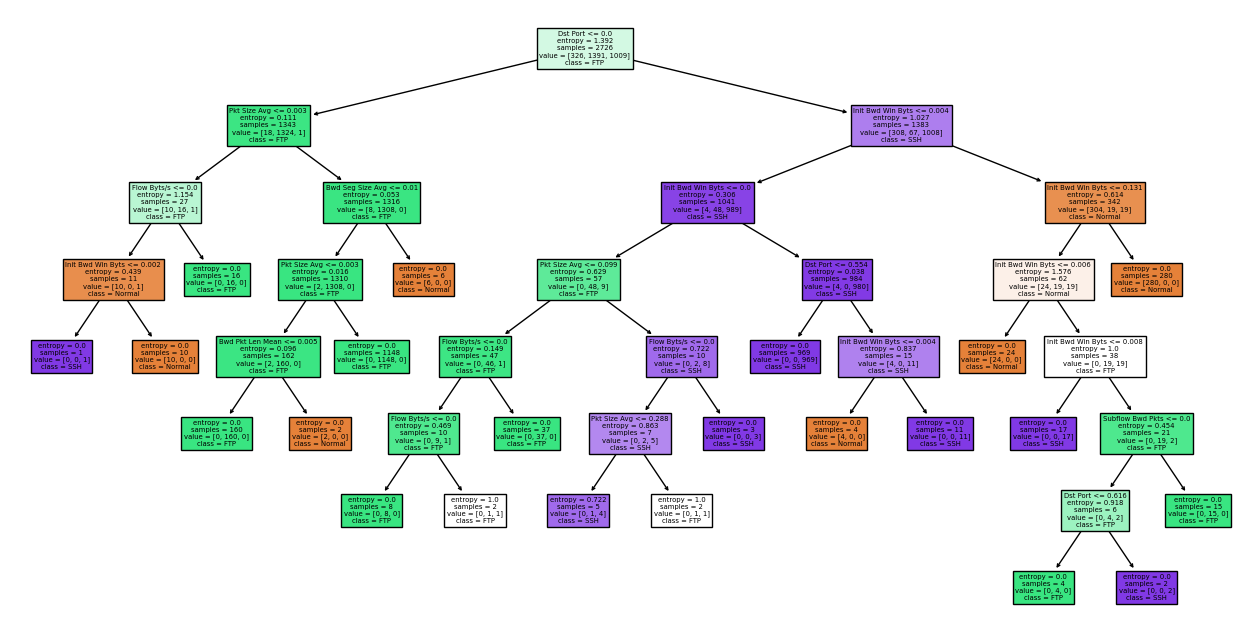

In [ ]:
from sklearn import tree
plt.figure(figsize=(16, 8))
# Convert numerical class labels to string labels
class_names = ["Normal", "FTP", "SSH"]
y_string_labels = [class_names[label] for label in y_my_test]
#class_names = [str(label) for label in clf.classes_.tolist()]
tree.plot_tree(clf2, filled=True, feature_names= X_my_test.columns,class_names=[class_names[label] for label in clf2.classes_])

plt.show()

In [ ]:
# from sklearn.ensemble import VotingClassifier
# combined_model = VotingClassifier(estimators=[clf,clf2], voting="soft" )
# combined_model.estimators_ = [clf,clf2]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)

    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)
# random = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
# random_cross = fit_and_evaluate(random, X_train_std , X_test_std , y_train , y_test)

# print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
# y_pred = random.predict(X_test_std)
# print("Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
#intial time = t1
t1 = time.time()

random = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
random_cross = fit_and_evaluate(random, X_my_std , X_my_test_std , y_my, y_my_test)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

#final time = t2
t2 = time.time()

#Training processing time = train_time
train_time[1] = t2 -t1

Random Forest Performance on the test set: Cross Validation Score = 0.9949


In [ ]:
#intial time = t1
t1 = time.time()

y_my_pred2 = random.predict(X_my_test_std)
print(y_my_pred2)

#final time = t2
t2 = time.time()

#Prediction processing time = train_time
pred_time[1] = t2 -t1

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy[1] = accuracy_score(y_my_test, y_my_pred2)
print("Accuracy: ", accuracy[1])

Accuracy:  1.0


In [ ]:
print('Processing Time for Training  : %.3f' % train_time[1])
print('Processing Time for Prediction: %.3f' % pred_time[1])

Processing Time for Training  : 0.201
Processing Time for Prediction: 0.008


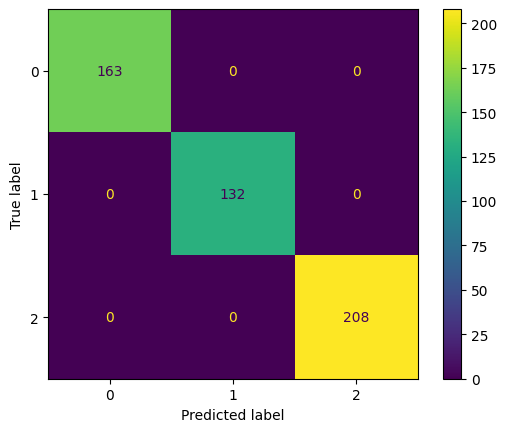

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred2, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [ ]:
print('Classification report: \n', classification_report(y_my_test, y_my_pred2))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       208

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = (cm.sum() - (FP + FN + TP)).sum()
FP = FP.sum()
print("False Positives:",FP)
FN = FN.sum()
print("False Negatives:",FN)
TP = TP.sum()
print("True Positives:",TP)
print("True Negatives:",TN)
# False positive rate
FPR = FP/(FP+TN)
print("False Positive Rate:",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate:",FNR)
FPR_arr[1] = FPR
FNR_arr[1] = FNR

False Positives: 0
False Negatives: 0
True Positives: 503
True Negatives: 1006
False Positive Rate: 0.0
False Negative Rate: 0.0


In [ ]:
from sklearn.neural_network import MLPClassifier

#intial time = t1
t1 = time.time()

NeuralNet_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
NeuralNet_model.fit(X_my_std, y_my)

#final time = t2
t2 = time.time()

#Training processing time = train_time
train_time[2] = t2 -t1

Iteration 1, loss = 1.06845580
Iteration 2, loss = 1.02351076
Iteration 3, loss = 0.97860447
Iteration 4, loss = 0.93876775
Iteration 5, loss = 0.90720535
Iteration 6, loss = 0.88089535
Iteration 7, loss = 0.85839455
Iteration 8, loss = 0.83851038
Iteration 9, loss = 0.81905416
Iteration 10, loss = 0.80028933
Iteration 11, loss = 0.78124737
Iteration 12, loss = 0.76225551
Iteration 13, loss = 0.74349747
Iteration 14, loss = 0.72448141
Iteration 15, loss = 0.70570429
Iteration 16, loss = 0.68731936
Iteration 17, loss = 0.66952621
Iteration 18, loss = 0.65227639
Iteration 19, loss = 0.63573400
Iteration 20, loss = 0.61915945
Iteration 21, loss = 0.60331106
Iteration 22, loss = 0.58784369
Iteration 23, loss = 0.57307765
Iteration 24, loss = 0.55883672
Iteration 25, loss = 0.54540515
Iteration 26, loss = 0.53245613
Iteration 27, loss = 0.52020172
Iteration 28, loss = 0.50863850
Iteration 29, loss = 0.49773650
Iteration 30, loss = 0.48774948
Iteration 31, loss = 0.47812032
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#intial time = t1
t1 = time.time()

y_my_pred3 = NeuralNet_model.predict(X_my_test_std)
print(y_my_pred3)

#final time = t2
t2 = time.time()

#Prediction processing time = train_time
pred_time[2] = t2 -t1

[2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2
 2 1 2 1 2 1 2 2 2 1 1 2 2 1 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2
 2 2 1 2 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy[2] = accuracy_score(y_my_test, y_my_pred3)
print("Accuracy: ", accuracy[2])

Accuracy:  0.8508946322067594


In [ ]:
print('Processing Time for Training  : %.3f' % train_time[2])
print('Processing Time for Prediction: %.3f' % pred_time[2])

Processing Time for Training  : 3.498
Processing Time for Prediction: 0.014


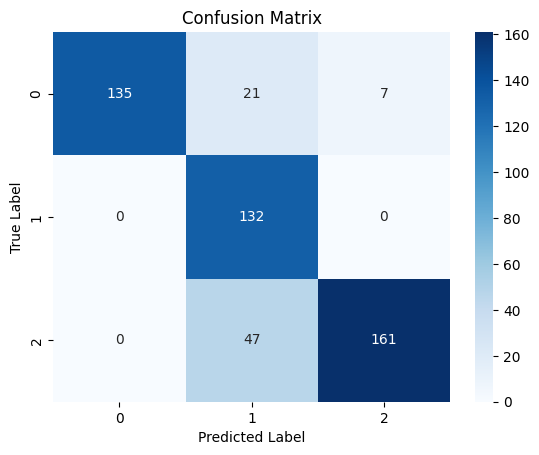

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred3)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification report: \n', classification_report(y_my_test, y_my_pred3))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       163
           1       0.66      1.00      0.80       132
           2       0.96      0.77      0.86       208

    accuracy                           0.85       503
   macro avg       0.87      0.87      0.85       503
weighted avg       0.89      0.85      0.86       503



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = (cm.sum() - (FP + FN + TP)).sum()
FP = FP.sum()
print("False Positives:",FP)
FN = FN.sum()
print("False Negatives:",FN)
TP = TP.sum()
print("True Positives:",TP)
print("True Negatives:",TN)
# False positive rate
FPR = FP/(FP+TN)
print("False Positive Rate:",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate:",FNR)
FPR_arr[2] = FPR
FNR_arr[2] = FNR

False Positives: 75
False Negatives: 75
True Positives: 428
True Negatives: 931
False Positive Rate: 0.07455268389662027
False Negative Rate: 0.14910536779324055


In [ ]:
from sklearn.naive_bayes import GaussianNB

#intial time = t1
t1 = time.time()

NB_model = GaussianNB()
NB_model.fit(X_my_std, y_my)

#final time = t2
t2 = time.time()

#Training processing time = train_time
train_time[3] = t2 -t1

In [ ]:
#intial time = t1
t1 = time.time()

y_my_pred4 = NB_model.predict(X_my_test_std)
print(y_my_pred4)

#final time = t2
t2 = time.time()

#Prediction processing time = train_time
pred_time[3] = t2 -t1

[2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2
 2 1 2 1 2 1 2 2 2 1 1 2 2 1 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2
 2 2 1 2 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 1 2 2 0 2 1 1 0 1 2 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy[3] = accuracy_score(y_my_test, y_my_pred4)
print("Accuracy: ", accuracy[3])

Accuracy:  0.8648111332007953


In [ ]:
print('Processing Time for Training  : %.3f' % train_time[3])
print('Processing Time for Prediction: %.3f' % pred_time[3])

Processing Time for Training  : 0.007
Processing Time for Prediction: 0.005


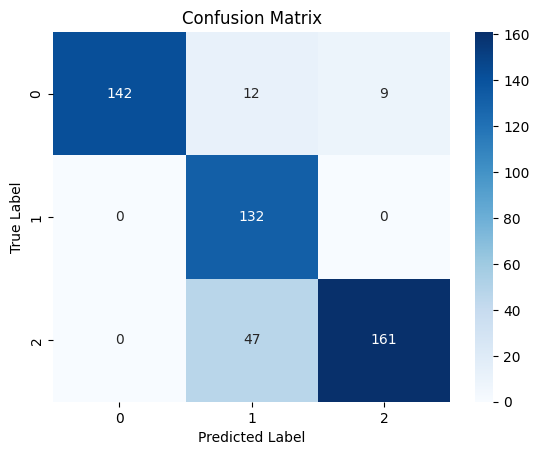

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred4)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification report: \n', classification_report(y_my_test, y_my_pred4))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       163
           1       0.69      1.00      0.82       132
           2       0.95      0.77      0.85       208

    accuracy                           0.86       503
   macro avg       0.88      0.88      0.87       503
weighted avg       0.90      0.86      0.87       503



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = (cm.sum() - (FP + FN + TP)).sum()
FP = FP.sum()
print("False Positives:",FP)
FN = FN.sum()
print("False Negatives:",FN)
TP = TP.sum()
print("True Positives:",TP)
print("True Negatives:",TN)
# False positive rate
FPR = FP/(FP+TN)
print("False Positive Rate:",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate:",FNR)

FPR_arr[3] = FPR
FNR_arr[3] = FNR

False Positives: 68
False Negatives: 68
True Positives: 435
True Negatives: 938
False Positive Rate: 0.06759443339960239
False Negative Rate: 0.13518886679920478


In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import metrics

# checking the accuracy score for k-value
k_range = list(range(1,26))

scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_my_std, y_my)
  y_my_pred5 = knn.predict(X_my_test_std)
  scores.append(metrics.accuracy_score(y_my_test, y_my_pred5))

scores

[0.9423459244532804,
 0.9383697813121272,
 0.9383697813121272,
 0.9343936381709742,
 0.9343936381709742,
 0.9324055666003976,
 0.9324055666003976,
 0.9324055666003976,
 0.974155069582505,
 0.9244532803180915,
 0.9244532803180915,
 0.9244532803180915,
 0.9145129224652088,
 0.9145129224652088,
 0.9105367793240556,
 0.9125248508946322,
 0.9025844930417495,
 0.6381709741550696,
 0.6381709741550696,
 0.6381709741550696,
 0.952286282306163,
 0.952286282306163,
 0.952286282306163,
 0.9562624254473161,
 0.9562624254473161]

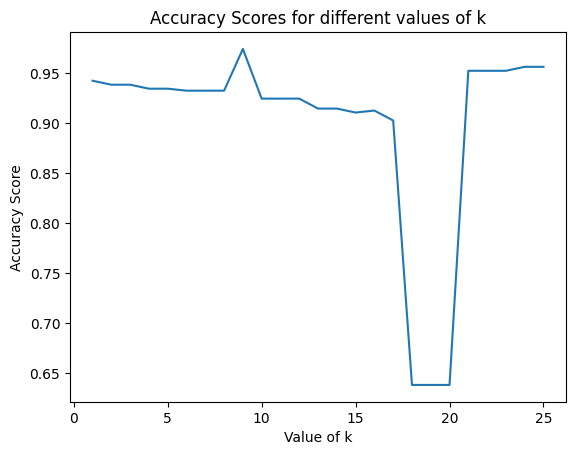

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [ ]:
#intial time = t1
t1 = time.time()

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_my_std, y_my)
print(knn.score(X_my_test_std,y_my_test))

#final time = t2
t2 = time.time()

#Training processing time = train_time
train_time[4] = t2 -t1

0.974155069582505


In [ ]:
#intial time = t1
t1 = time.time()

y_my_pred5 = knn.predict(X_my_test_std)
y_my_pred5

#final time = t2
t2 = time.time()

#Prediction processing time = train_time
pred_time[4] = t2 -t1

In [ ]:
accuracy[4] = accuracy_score(y_my_test, y_my_pred5)
print("Accuracy: ", accuracy[4])

Accuracy:  0.974155069582505


In [ ]:
print('Processing Time for Training  : %.3f' % train_time[4])
print('Processing Time for Prediction: %.3f' % pred_time[4])

Processing Time for Training  : 0.069
Processing Time for Prediction: 0.054


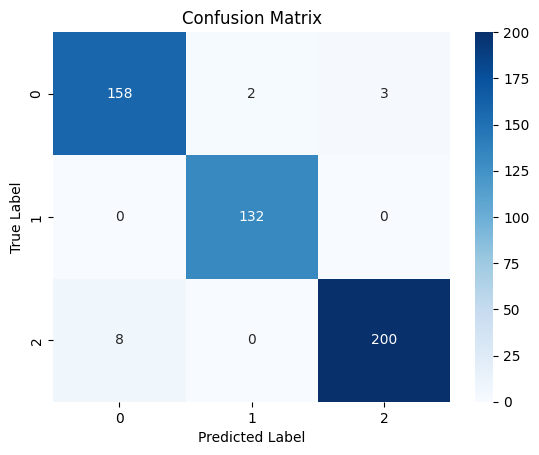

In [ ]:
cm = confusion_matrix(y_my_test, y_my_pred5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification report: \n', classification_report(y_my_test, y_my_pred5))

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       163
           1       0.99      1.00      0.99       132
           2       0.99      0.96      0.97       208

    accuracy                           0.97       503
   macro avg       0.97      0.98      0.98       503
weighted avg       0.97      0.97      0.97       503



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = (cm.sum() - (FP + FN + TP)).sum()
FP = FP.sum()
print("False Positives:",FP)
FN = FN.sum()
print("False Negatives:",FN)
TP = TP.sum()
print("True Positives:",TP)
print("True Negatives:",TN)
# False positive rate
FPR = FP/(FP+TN)
print("False Positive Rate:",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate:",FNR)

FPR_arr[4] = FPR
FNR_arr[4] = FNR

False Positives: 13
False Negatives: 13
True Positives: 490
True Negatives: 993
False Positive Rate: 0.012922465208747515
False Negative Rate: 0.02584493041749503


In [ ]:
print(train_time)
print(pred_time)
print(accuracy)
print(FPR_arr)
print(FNR_arr)

z = ['Decision Tree','Random Forest','Neural Network','Naive Bayes','KNN']

[0.010485649108886719, 0.20136356353759766, 3.4984188079833984, 0.007155418395996094, 0.06917548179626465]
[0.004926919937133789, 0.007969379425048828, 0.014162540435791016, 0.005231618881225586, 0.05389738082885742]
[1.0, 1.0, 0.8508946322067594, 0.8648111332007953, 0.974155069582505]
[0.0, 0.0, 0.07455268389662027, 0.06759443339960239, 0.012922465208747515]
[0.0, 0.0, 0.14910536779324055, 0.13518886679920478, 0.02584493041749503]


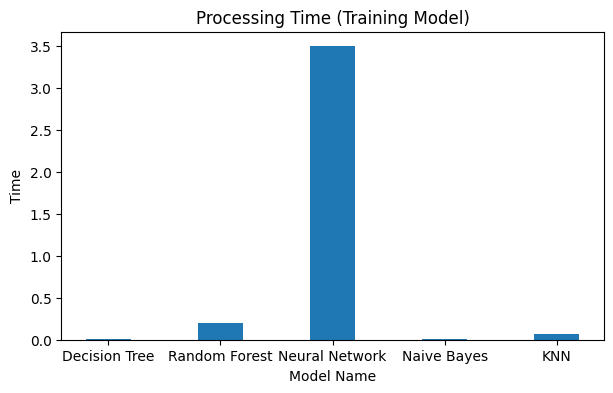

In [ ]:
fig = plt.figure(figsize = (7, 4))

# creating the bar plot
plt.bar(z, train_time,width = 0.4)

plt.xlabel("Model Name")
plt.ylabel("Time")
plt.title("Processing Time (Training Model)")
plt.show()


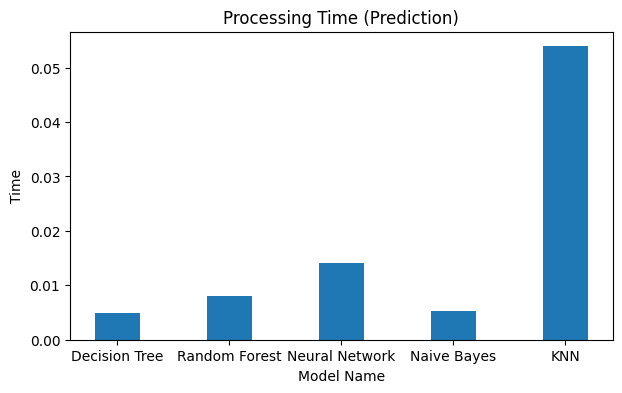

In [ ]:
fig = plt.figure(figsize = (7, 4))

# creating the bar plot
plt.bar(z, pred_time,width = 0.4)

plt.xlabel("Model Name")
plt.ylabel("Time")
plt.title("Processing Time (Prediction)")
plt.show()


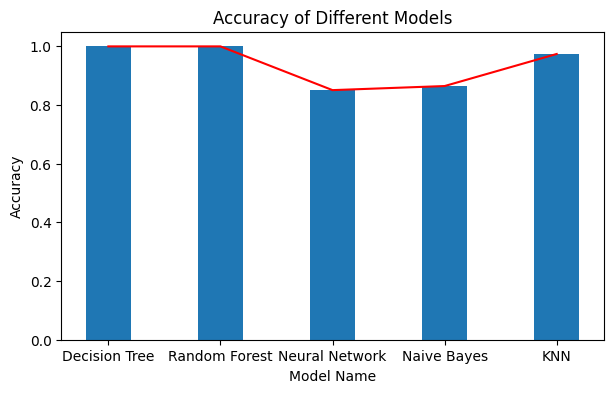

In [ ]:
fig = plt.figure(figsize = (7, 4))

# creating the bar plot
plt.bar(z, accuracy,width = 0.4)
plt.plot(z, accuracy, color ='red')
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()
